In [180]:
%tensorflow_version 2.x
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt 

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
#from tensorflow.python.eager.monitoring import Metric


print(tf.keras.__version__)

2.8.0


In [181]:
#Cargando datos 
#datos, metadatos = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

#Otra forma de cagar datos (forma2)
fashion_mnist = keras.datasets.fashion_mnist #no tiene metadatos por lo que se debe colocar las clases manualmente

In [182]:
#Proporciona informacion del conjunto de datos
metadatos

tfds.core.DatasetInfo(
    name='fashion_mnist',
    version=3.0.1,
    description='Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.',
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao and
                   Kashif Rasul and
                   Roland Vollgraf},
      title     = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning
                   Algorithms},
      journal   = {CoRR},
      volume

In [183]:
#Separando datos de entrenamiento y prueba
#train_images, test_images = datos['train'], datos['test']

#para el otro conjunto de datos
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [184]:
#Clases de dataset pra el conjunto que contiene metadatos
labels = metadatos.features['label'].names
labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [185]:
#Se trbajara con el conjunto (forma 2)
#como no tiene etiquetas las ingresamos manualmente 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [186]:
#Normalizar datos 0-1
def Normalizar(images):
  images = tf.cast(images, 'float32')
  images /= 255.0
  return images

train_images = Normalizar(train_images)
test_images = Normalizar(test_images)

#Buena practica comprobar la forma 
print("train_images.shape", train_images.shape)
print("len(train_labels)", len(train_labels))
print("test_amages.shape", test_images.shape)
print("len(test_labels)", len(test_labels))


train_images.shape (60000, 28, 28)
len(train_labels) 60000
test_amages.shape (10000, 28, 28)
len(test_labels) 10000


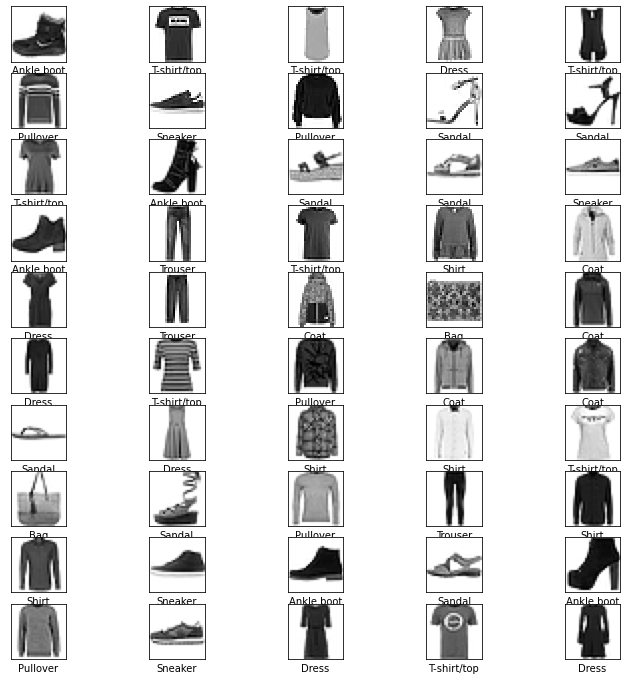

In [187]:
from typing import Any

#Comprobar si las muestras y etiquetas con los valores que esperamos
train_labels

plt.figure(figsize=(12,12)) #tamaño de cada imagen o subgrafica
for i in range(50): 
  plt.subplot(10, 5, i+1) # 10 renglones de imagens y 5 imagenes por clumna
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()


In [188]:
from tensorflow.python.ops.gen_math_ops import sigmoid
#Denifir el modelo
model = Sequential()
#reconvierte las muestras de entrada de imagen 28x28 a un vector 
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 10)                7850      
                                                                 
 dense_21 (Dense)            (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [189]:
#Configurar el modelo
#optimizaer funcion para optimizar los pesos retropaga el error(backpropagation)
#loss funcion de coste que dirige el entrenamiento a la direccion correcta
#durante el proceso de entrenamiento 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [190]:
#Entrenamiento del modelo
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0651 - accuracy: 0.6936
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5654 - accuracy: 0.8201
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4778 - accuracy: 0.8380
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4426 - accuracy: 0.8466
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4215 - accuracy: 0.8529


In [191]:
#Evaluacion del modelo
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.4531 - accuracy: 0.8391
Test accuracy:  0.8391000032424927


(10000, 28, 28)
forma que regresa model.predict:  (10000, 10)
[8.9636967e-03 9.8358834e-01 5.0752494e-04 2.9411903e-03 8.9184317e-04
 4.0833615e-06 1.1802018e-03 8.7766944e-05 1.8257180e-03 9.4892666e-06]
1
Trouser


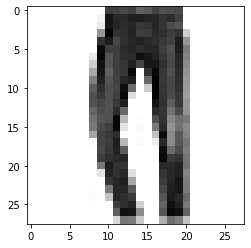

In [192]:
#Predicciones
print(test_images.shape)
#el modelo ya aplasta las entradas de 28,28 a las neuronas
predictions = model.predict(test_images)
#la forma del predcir es el nuemro de la ultima capa de neuronas
print("forma que regresa model.predict: ", predictions.shape)

#de las imagenes de test tomamos la amtriz 5 para tener uan idea visual
plt.imshow(test_images[5], cmap=plt.cm.binary)

#Lo que nos predice el modelo
print(predictions[5])
print(np.argmax(predictions[5]))
print(class_names[np.argmax(predictions[5])])




In [193]:
#Funcion Extraida de Tensor flow
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00BF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

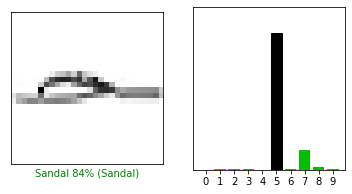

In [194]:
i = 8
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

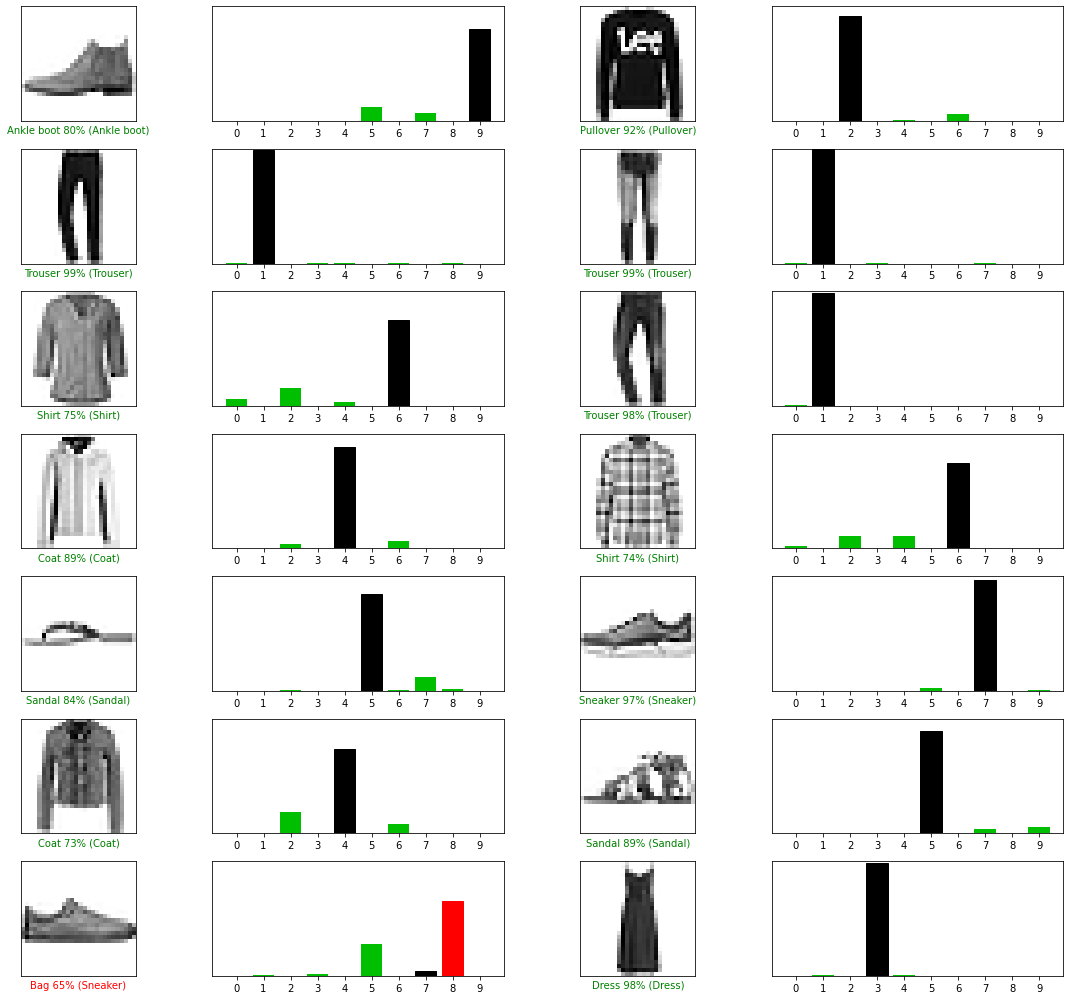

In [195]:
num_rows = 7
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(4*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)     
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()
